## Data Science for Cybersecurity, 2020@NCCU

Midterm, 2020/04/27 (Mon) 19:00 to 2020/04/30 (Thr) 23:59.

* Make sure you copy this file to YOUR OWN Google Drive before starting to take the exam.
* You MUST send your .ipynb (in terms of colab sharable link) to TA via email **before 04/30 23:59**. Late submission is allowed, but with a 20% per day penalty. You CANNOT discuss midterm with anyone.
* Make sure the file is shared to TA and you CANNOT share the file with anothers, except TA.

---


### Question #0

What is your name and student ID?

Answer #0

Name: 郭宇雋

Student ID: 106306062

---

### Question #1

1-1. Please write some statements about three security concepts: safety, security, and assurance.

1-2. What is the relationship between the following security concepts: cost and risk (probability and impcat). How do we evaluate a security incident?

1-3. Why data analysis is related to cybersecurity? (You may use the answer of 1-1 and 1-2 to further discuss this question.)

Answer #1

**1-1**

Safety : 是一種偏向內在感受的概念，須達到 CIA，也就是機密性(Confidentiality)、一致性(Integrity)、可用性(Avalibility)。通常在企業內是"老闆"這個角色最為在意此概念。

Security : 是一種偏向外在的概念，須達到 AAA，也就是認證(Authorization)、授權(Authentication)、可歸責(Accountability)。

唯有達到 security 的 AAA，才能達到 safety (Secure)。

而要達到 AAA，除了要知道使用者是誰之外，還要知道使用者對系統做了什麼操作與改變，此外也要有系統 log 來記錄，才能在發生意外時有歸責的對象。通常在企業內是"管理者"負責此概念的實現。

Assurance : 做的是系統的審核(Auditing)、測試(Testing)與監控(Monitoring)，以確保(Guarantee)資訊系統的安全以及運作正常。通常在企業內是"稽核人員"負責此概念的實現。


**1-2**

若是某資安事件的發生機率(Probability)很高，且造成的影響(Impact)也很大，則此事件就需要被仔細的預防。相對的，若是發生機率與造成的影響皆很低，則可以，則可以忽略(接受)此風險的存在。這些可以透過 Risk Matrix 去做評估。簡而言之，Cost 與 Risk 之間的關係需要取得一個平衡點，若是某事件的風險在可以接受的範圍內，則可以不花費心力去處理該事件;反之，若是某事件的風險危害很大，則公司就需要謹慎地去做資安防護，以防止該事件的發生。

**1-3**

如同 1-2 所提及的，成本是企業考量的重要因素，對於大量的資料，一個一個檢查肯定不是好的方法，因此對於像是網路封包這種大量資料，惡意封包的資料分析就可以做到很好的節省時間成本。而對於一些發生機率(Probability)較低，且危害(Impact)也小的資安事件，用簡單的資料分析模型去做判斷便能達到一定程度的防護，同時又不需要投入很多成本。

---

### Question #2

The following figure is the data science lifecycle.


In [1]:
!wget https://drive.google.com/uc?id=1In_R3tdbxkrxc4Q8xeJ0iewRyXVhVCDy -O dslc.png

--2020-04-28 14:56:45--  https://drive.google.com/uc?id=1In_R3tdbxkrxc4Q8xeJ0iewRyXVhVCDy
Resolving drive.google.com (drive.google.com)... 173.194.79.139, 173.194.79.138, 173.194.79.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ckf2pju2bfvjfckoe16crbf5kks8hqk/1588085775000/17174434063503717705/*/1In_R3tdbxkrxc4Q8xeJ0iewRyXVhVCDy [following]
--2020-04-28 14:56:45--  https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ckf2pju2bfvjfckoe16crbf5kks8hqk/1588085775000/17174434063503717705/*/1In_R3tdbxkrxc4Q8xeJ0iewRyXVhVCDy
Resolving doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)|173.19

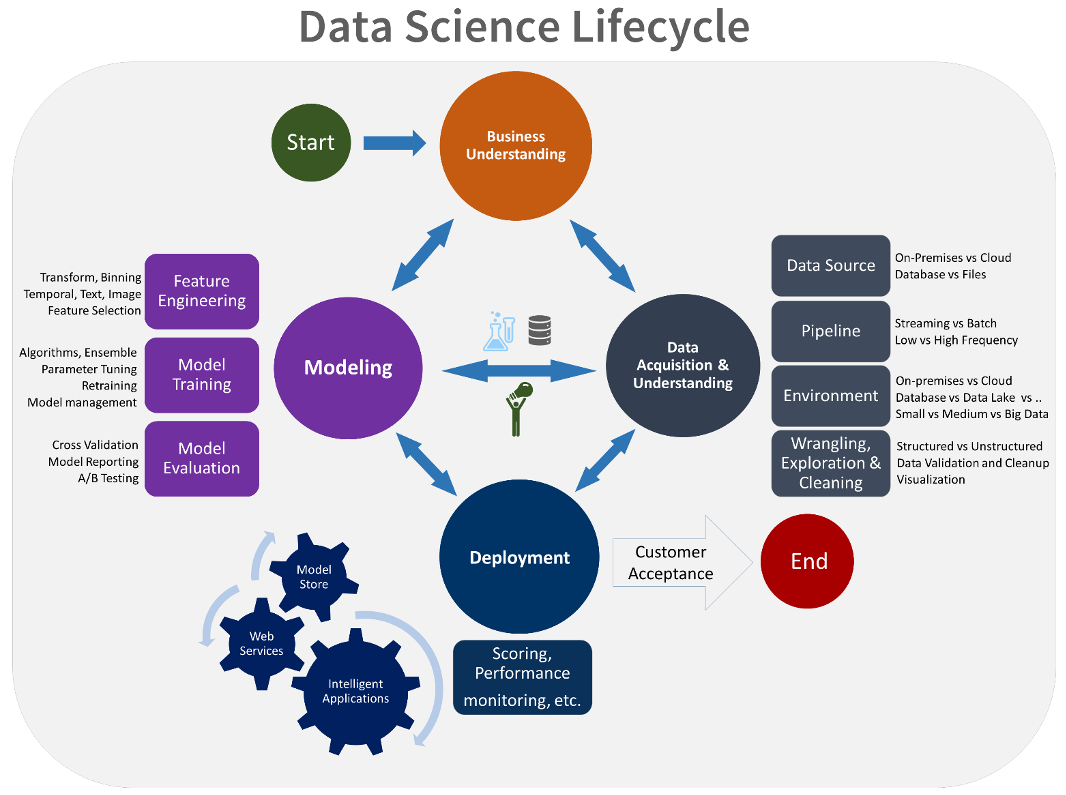

In [2]:
from IPython.display import Image
Image(filename="/content/dslc.png", width=800)

2-1. There are several problems when performing modeling. For exmaple, there might be too many data points in the training data. How do you deal with such problem (and please state your solutions)? Could you name some python libraries that can help you to quickly solve such problem?

2-2 What the the major issues if you apply such solution to your 'too-many-data' dataset?

2-3. If there are too few data points in the traning data, how do you deal with it?

2-4. What the the major issues if you apply such solution to your 'too-few-data' dataset?

2-5. What if there are too many features in the traning data? Any solution?

2-6. What if there are too few features in the traning data? Any solution?

2-7. For a classification problem, if the number of data in the each class in the training data is imbalanced, how do you deal with it?


Answer #2

**2-1**

若是資料量過多，首先可以先去除 Outliers，方法可以是超過正負三個標準差以外的資料點就移除，另一個方法是小於 Q1-(1.5)IQR 或大於 Q3+(1.5)IQR 的資料點就移除。

再來則是要防 Overfitting，因為資料量大則更有可能產生 overfitting 的問題。因此可以透過 Regularization 的方式，在 Loss function 中加入 𝜆∑𝜃𝑗 這一項，以防止模型過度配適。

最後，若是資料量真的過多，導致訓練花的時間太多，則可以透過 Random  Sampling (UnderSampling) 的方式，隨機選取原先資料點中的部分資料來做訓練即可。

在 Python 的函式庫方面，移除 Outlier 可以使用 pandas 的 Dataframe 條件篩選達成; 而加入 Regularization 則可以透過使用 sklearn.linear_model 中的 Lasso，並調整 alpha 參數即可達成; 而 Random Sampling 可以透過 imblearn.under_sampling 套件中的 RandomUnderSampler 函式來達成。

**2-2**

主要問題會出現在如何調整 Regularization 的 alpha (或者稱作𝜆) 參數，因為若是此 alpha 值過大，則表示懲罰項變得很大，如此會導致許多變數的係數變為0，反而會導致模型配適不足 (Underfitting); 但若是此 alpha 值過小，則會與未加入 Regularization 的模型沒有差別，仍然會 Overfitting。因此如何調整 Regularization 這一項的參數，會是很重要的問題。

此外，若是用 Random Sampling 去取部分資料做訓練，則要注意取出的資料是否有足夠的代表性，也要小心不要只取到有某些相同特徵的部分資料。

**2-3**

若是資料量過少，在神經網路的問題上，可以使用 Transfer learning 的方式，使用別人訓練好的模型，並加入自己的資料來做微調。而若是真的想要產生更多資料，可以使用 GAN 去做模擬生成資料，或是用 Data Augmentation 的方式對現有的資料做旋轉、切片等方式，來產生新的資料。甚至可以透過內插法，也就是在原先的多個資料點之間加入一個新的資料點，來製作 Fake Data。

**2-4**

主要的問題會出現在，無論是用 GAN 或是 Data Augmentation 去做資料的增加，新的資料都會與現有的資料很相似，因此有很高的機率會產生 Overfitting 的問題。再者，若是用內插法去做 Fake Data，則這些新增的 Fake Data 是否具有代表性，也是一個需要謹慎思考的問題。

**2-5**

若是變數過多，則可以透過 PCA 的方式去做維度縮減(降維)。

因為 PCA 僅僅是空間的線性對應轉換，因此 PCA 後的結果仍然保留原先的總變異。透過觀察各個主成份的解釋變異量，來決定保留的主成份個數 (一般而言前幾個主成份就可以解釋大部分的總變異)。因此就可以把原先的大量變數，縮減為某幾個主成份，如此便達到維度的縮減與變數的減少。

**2-6**

若是變數過少，可以進行 Feature Combination，也就是透過把原有的變數做運算，來產生新的變數。然而如此一來，此新變數與原有的變數就會有很高的相關性，這點需要額外考慮。

此外，若是變數過少，其實最好的解決辦法應該就是多收集一些變數，因為變數的個數與預測的準確率是息息相關的，若是變數過少，那要訓練出一個好的預測模型會是一件非常困難的事。

**2-7**

若是分類問題中，發生資料數量不平衡的現象，可以做 OverSampling 或 Undersampling。

簡單的 Oversampling 做法就是將數量較少的那類，隨機複製其中的某些資料點，然而此動作後，資料的分佈會產生改變，且若是有資料被標籤錯誤，則模型的準確度就會受到較大的影響。

而簡單的 Undersampling 則是隨機把數量較多的那類中的資料點刪除，然而此動作後，資料的分佈也會改變。

此外，還可以做 Resampling，透過將原有的資料做結合來產生新的資料。SMOTE 是其中一種 Resampling 方法，他是透過在資料量較少的那類中，在兩個點中間加入一個新的點，來達成資料的增量。而 ADASYN 則是則是 SMOTE 的改良版，ADASYN 也是在同類的兩點中加入一個新的點，然而 ADASYN 會再隨機將一個微小的值加入新的點上，使新的資料點更有彈性，而非單純只是原有資料的線性組合。

---

###Question #3:

3-1. Tree-based algorithms can deal with numeric data and categorical data. We show the logistic regression can deal with numeric data in the class (T06). Could logistic regression manage categorical data? Why or why not?


3-2. Is there any generalized method that we can convert any categorical data to numeric form? Show me one method, and what are the issues of such methods?


3-3. PCA is one of the method to reduce the traning data dimension. How do we evaluate how many dimensions we should keep? 


3-4. Does PCA (i.e., dimension reduction) do harm to the preduction? Why or why not?



Answer #3

**3-1**

Logistic Regression 可以處理 Categorical Data (類別變數)。

因為若是此變數為二元分類的變數，則可以透過 Dummy Variable 將其轉換為 0 與 1。若是此變數為多元分類的變數，則可以透過 One hot Encoding 的方式將其做轉換，例如若為三類，則會新增三個欄位，這三類對應到這三個欄位的值會分別為 100 / 010 / 001。透過這些轉換後，變數就都變為數值型變數，Logistic Regression 就可以做數學的計算。

**3-2**

同上題，透過 Dummy variable 可以將類別變數轉換為數值變數。

若是二元分類變數，則轉換為 0 與 1。

若是多元分類，則透過 One hot Encoding 的方式轉換。例如若為三類，則會新增三個欄位，這三類對應到這三個欄位的值會分別為 100 / 010 / 001，然而如此可能會在迴歸分析等模型上遇到 Dummy variable Trap 的問題，也就是產生共線性。因為三個類別其實用兩個變數表示就足夠了，所以在分析上可能會使用兩個欄位即可(10/01/00)，也就是 n 個類別用 n-1 個變數表示。


**3-3**

透過觀察各主成份(PC)可以解釋的總變異量(貢獻率)，並訂定一個自己認為可以接受的解釋總變異量，通常會是 80% 或 90% 以上，然後去選取前 n 個主成份，直到這幾個主成份的累計貢獻率(累計可以解釋的總變異量)達到我們的要求，此時的 n 即為要選的主成份數量 (dimension數量)。

若是用 Python 實現，則可以透過 pca.explained_variance_ratio_ 查看各主成份可以解釋的總變異量，並選擇解釋變異量加總可以滿足我們要求的主成份數量。

**3-4**

PCA 會不會造成預測結果變差，要看最終選取的主成份(PC)數量的解釋變異量是否足夠。

若是選擇的主成份數量不夠，導致這幾個主成份可以解釋的總變異量太低，則會造成模型 underfitting，預測能力也會變差。

然而，若是選取的主成份(PC)數量足夠，解釋的總變異量也足夠，則模型預測的能力就不會變差，有時候甚至可能會變更好，因為原先的模型可能有 overfitting 的問題，而在經過 PCA 後因為選擇較少的變數，模型解釋較少的總變異，因此 overfitting 的問題可能會被解決，導致在測試資料上的預測能力變好。

上面的預測能力都是針對"測試資料"做解釋，然而對於"訓練資料"，若是經過 PCA 降維，則訓練資料上的準確率一定會變低，因為原先的變數可以解釋 100% 的總變異，然而 PCA 後所選取的主成份個數幾乎都無法解釋到 100% 的總變異，因此訓練上的準確率會變低。然而這是好的現象，因為模型最終的目標仍然是在測試資料上有好的預測能力，而非在訓練資料上有很高的準確率，且若是在訓練資料上的準確率過高，則很可能就是發生 overfitting 的問題。

結論，若是使用 PCA，並選擇足夠數量的主成份(PC)，則模型的預測能力理論上是不會變差的。

---


###Question #4:

Assume we have the following training data (california_housing_train.csv). The 'target' of this dataset is 'median_house_value'.

In [3]:
import pandas as pd 

ca_df = pd.read_csv("/content/sample_data/california_housing_train.csv")
print(ca_df.shape)
ca_df.head()

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
# make a backup
ca_orig_df = ca_df.copy()

4-1. Do some data preprocessing and feature engineering. Please leave some comments in your codes. At last, please print the first 5 rows of your new dataframe (name it as "ca_my_df"). 


In [5]:
# make a backup
ca_my_df = ca_df.copy()

# Try to do data preprocessing and feature engineering here. save the result in 'ca_my_df'.

# 新增變數 : 每個家庭平均的房間數量
ca_my_df["room_per_hh"] = ca_my_df["total_rooms"] / ca_my_df["households"]
# 新增變數 : Bedroom 的比例
ca_my_df["bedroom_rate"] = ca_my_df["total_bedrooms"] / ca_my_df["total_rooms"]
# 新增變數 : 家庭平均人口數
ca_my_df["pop_per_hh"] = ca_my_df["population"] / ca_my_df["households"]

# 定義移除離群值(outlier)的 function : 大於平均加減三倍標準差則視為 outlier
def remove_outlier(df, col):
    m = df[col].mean()
    s = df[col].std()
    df = df[(df[col] > m-(3*s)) & (df[col] < m+(3*s))] 
    return df

# 移除每個欄位的離群值
for col in ca_my_df.columns:
    ca_my_df = remove_outlier(ca_my_df, col)

# 先將目標變數與其他變數分開，因為目標變數不做 Normalization
target = ca_my_df["median_house_value"].copy()
ca_my_df = ca_my_df.drop(["median_house_value"], axis=1)

# MinMax Normalization
from sklearn.preprocessing import MinMaxScaler
ca_my_df = pd.DataFrame(MinMaxScaler().fit_transform(ca_my_df), columns=ca_my_df.columns, index=ca_my_df.index)

# 將目標變數加回來原本的 DataFrame
ca_my_df["median_house_value"] = target

# 查看 Data preprocessing 與 feature engineering 處理後的結果
print(ca_my_df.shape)
ca_my_df.head()


(15351, 12)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_hh,bedroom_rate,pop_per_hh,median_house_value
0,1.000000,0.175345,0.274510,0.636798,0.888272,0.282919,0.405709,0.108641,0.909538,0.455854,0.254015,66900.0
2,0.975100,0.122210,0.313725,0.080509,0.118668,0.092256,0.098616,0.125839,0.396829,0.502105,0.380209,85700.0
3,0.974104,0.116897,0.254902,0.169320,0.231783,0.143137,0.192907,0.294295,0.440426,0.441322,0.277293,73400.0
4,0.974104,0.109458,0.372549,0.163975,0.224150,0.173609,0.224048,0.155807,0.342820,0.440230,0.295961,65500.0
5,0.973108,0.115834,0.549020,0.156357,0.161693,0.186749,0.204152,0.310924,0.365499,0.248635,0.373204,74000.0


4-2. Assume part of the data is missing in this training data. Say 20% of the 'housing_median_age' is missing (randomly). Please provide a method to help yourself to do missing value imputation.

In [0]:
# randomly drop 20% of the 'housing_median_age' data in ca_my_df
# and save the result in ca_my_missing_df
import numpy as np

housing_median_age_orig_ser = ca_my_df['housing_median_age'].copy()

random_ser = pd.Series(np.random.random_sample(ca_my_df.shape[0]), index = ca_my_df.index)

ca_my_missing_df = ca_my_df.copy()
ca_my_missing_df['housing_median_age'][random_ser <= 0.2] = np.NaN

In [7]:
# now there should be 20% of the housing_median_age is NaN (missing) in ca_my_missing_df
ca_my_missing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_hh,bedroom_rate,pop_per_hh,median_house_value
0,1.000000,0.175345,0.274510,0.636798,0.888272,0.282919,0.405709,0.108641,0.909538,0.455854,0.254015,66900.0
2,0.975100,0.122210,0.313725,0.080509,0.118668,0.092256,0.098616,0.125839,0.396829,0.502105,0.380209,85700.0
3,0.974104,0.116897,0.254902,0.169320,0.231783,0.143137,0.192907,0.294295,0.440426,0.441322,0.277293,73400.0
4,0.974104,0.109458,0.372549,0.163975,0.224150,0.173609,0.224048,0.155807,0.342820,0.440230,0.295961,65500.0
5,0.973108,0.115834,NaN,0.156357,0.161693,0.186749,0.204152,0.310924,0.365499,0.248635,0.373204,74000.0


In [8]:
ca_my_imp_df = ca_my_missing_df.copy()

# Now, propose a method to do missing value imputation. 
# save the result in ca_my_imp_df

# 用各欄位的"平均數"去做遺漏值填補
ca_my_imp_df = ca_my_imp_df.fillna(ca_my_imp_df.mean())

print("遺漏值個數: ", ca_my_imp_df.housing_median_age.isna().sum())
ca_my_imp_df.head()

遺漏值個數:  0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_hh,bedroom_rate,pop_per_hh,median_house_value
0,1.000000,0.175345,0.274510,0.636798,0.888272,0.282919,0.405709,0.108641,0.909538,0.455854,0.254015,66900.0
2,0.975100,0.122210,0.313725,0.080509,0.118668,0.092256,0.098616,0.125839,0.396829,0.502105,0.380209,85700.0
3,0.974104,0.116897,0.254902,0.169320,0.231783,0.143137,0.192907,0.294295,0.440426,0.441322,0.277293,73400.0
4,0.974104,0.109458,0.372549,0.163975,0.224150,0.173609,0.224048,0.155807,0.342820,0.440230,0.295961,65500.0
5,0.973108,0.115834,0.554442,0.156357,0.161693,0.186749,0.204152,0.310924,0.365499,0.248635,0.373204,74000.0


4-3. Run a simple liner regression using ca_orig_df, ca_my_df and your ca_my_imp_df to predict the 'median_house_value'. Show me 'MSE' values of these three datasets.


In [9]:
# regression here
from sklearn.linear_model import LinearRegression

# Origin model
orig_x = ca_orig_df.drop(["median_house_value"], axis=1)
orig_y = ca_orig_df["median_house_value"]
orig_model = LinearRegression()
orig_model.fit(orig_x, orig_y)

# My model
my_x = ca_my_df.drop(["median_house_value"], axis=1)
my_y = ca_my_df["median_house_value"]
my_model = LinearRegression()
my_model.fit(my_x, my_y)

# My imputed model
my_imp_x = ca_my_imp_df.drop(["median_house_value"], axis=1)
my_imp_y = ca_my_imp_df["median_house_value"]
my_imp_model = LinearRegression()
my_imp_model.fit(my_imp_x, my_imp_y)

from sklearn.metrics import mean_squared_error
# Origin MSE
orig_mse = mean_squared_error(orig_y,orig_model.predict(orig_x))
# My MSE
my_mse = mean_squared_error(my_y,my_model.predict(my_x))
# My imputed MSE
my_imp_mse = mean_squared_error(my_imp_y,my_imp_model.predict(my_imp_x))

# results
print("MSE ca_orig_df:", orig_mse)
print("MSE ca_my_df:", my_mse)
print("MSE ca_my_imp_df:", my_imp_mse)

MSE ca_orig_df: 4824523173.926901
MSE ca_my_df: 4095591035.154065
MSE ca_my_imp_df: 4137685150.860569


4-4. Even worse, median_income	has 20% fo missing value (randomly). Now, some data points have all feateues, some miss one feasure, and some miss two features. Please propose a method to deal with the problem.

In [10]:
ca_my_missing2_df = ca_my_missing_df.copy()

# drop 20% median_income here, and save it to ca_my_missing2_df
housing_median_income_orig_ser = ca_my_missing_df["median_income"].copy()

random_ser = pd.Series(np.random.random_sample(ca_my_missing_df.shape[0]), index = ca_my_missing_df.index)

ca_my_missing2_df["median_income"][random_ser <= 0.2] = np.NaN

ca_my_missing2_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_hh,bedroom_rate,pop_per_hh,median_house_value
0,1.000000,0.175345,0.274510,0.636798,0.888272,0.282919,0.405709,NaN,0.909538,0.455854,0.254015,66900.0
2,0.975100,0.122210,0.313725,0.080509,0.118668,0.092256,0.098616,NaN,0.396829,0.502105,0.380209,85700.0
3,0.974104,0.116897,0.254902,0.169320,0.231783,0.143137,0.192907,0.294295,0.440426,0.441322,0.277293,73400.0
4,0.974104,0.109458,0.372549,0.163975,0.224150,0.173609,0.224048,0.155807,0.342820,0.440230,0.295961,65500.0
5,0.973108,0.115834,NaN,0.156357,0.161693,0.186749,0.204152,0.310924,0.365499,0.248635,0.373204,74000.0


In [11]:
ca_my_imp2_df = ca_my_missing2_df.copy()

# imputation here, save to result as ca_my_imp2_df

# 用各欄位的"平均數"去對資料做遺漏值填補
ca_my_imp2_df = ca_my_imp2_df.fillna(ca_my_imp2_df.mean())

ca_my_imp2_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_hh,bedroom_rate,pop_per_hh,median_house_value
0,1.000000,0.175345,0.274510,0.636798,0.888272,0.282919,0.405709,0.357483,0.909538,0.455854,0.254015,66900.0
2,0.975100,0.122210,0.313725,0.080509,0.118668,0.092256,0.098616,0.357483,0.396829,0.502105,0.380209,85700.0
3,0.974104,0.116897,0.254902,0.169320,0.231783,0.143137,0.192907,0.294295,0.440426,0.441322,0.277293,73400.0
4,0.974104,0.109458,0.372549,0.163975,0.224150,0.173609,0.224048,0.155807,0.342820,0.440230,0.295961,65500.0
5,0.973108,0.115834,0.554442,0.156357,0.161693,0.186749,0.204152,0.310924,0.365499,0.248635,0.373204,74000.0


4-5. Show the average MSE of data points without missing value. Show the average MSE of data points with 1 missing feature. Show the average MSE of data points with 2 missing features. And show the MSE of all training data.

In [12]:
# do regression again here
# by using ca_my_imp2_df
my_imp2_x = ca_my_imp2_df.drop(["median_house_value"], axis=1)
my_imp2_y = ca_my_imp2_df["median_house_value"]
my_imp2_model = LinearRegression()
my_imp2_model.fit(my_imp2_x, my_imp2_y)

# MSE
my_imp2_mse = mean_squared_error(my_imp2_y, my_imp2_model.predict(my_imp2_x))
print("MSE ca_my_imp2_df:", my_imp2_mse)

MSE ca_my_imp2_df: 5076836369.59028


In [13]:
# split the ca_my_imp2_df into three small datasets according to the missing value criteria in ca_my_missing2_df

# the first dataset has no missing values in ca_my_missing2_df
no_missing_index = ca_my_missing2_df[(ca_my_missing2_df["housing_median_age"].notnull()) & (ca_my_missing2_df["median_income"].notnull())].index
no_missing_df = ca_my_imp2_df.loc[no_missing_index]

# the second dataset has 1 missing value in ca_my_missing2_df
one_missing_index = ca_my_missing2_df[(ca_my_missing2_df["housing_median_age"].notnull()) ^ (ca_my_missing2_df["median_income"].notnull())].index
one_missing_df = ca_my_imp2_df.loc[one_missing_index]

# the third dataset has 2 missing values in ca_my_missing2_df
two_missing_index = ca_my_missing2_df[(ca_my_missing2_df["housing_median_age"].isnull()) & (ca_my_missing2_df["median_income"].isnull())].index
two_missing_df = ca_my_imp2_df.loc[two_missing_index]

# calculate the MSE of these three datasets

# The models of these three datasets 
no_missing_x = no_missing_df.drop(["median_house_value"], axis=1)
no_missing_y = no_missing_df["median_house_value"]
no_missing_model = LinearRegression()
no_missing_model.fit(no_missing_x, no_missing_y)

one_missing_x = one_missing_df.drop(["median_house_value"], axis=1)
one_missing_y = one_missing_df["median_house_value"]
one_missing_model = LinearRegression()
one_missing_model.fit(one_missing_x, one_missing_y)

two_missing_x = two_missing_df.drop(["median_house_value"], axis=1)
two_missing_y = two_missing_df["median_house_value"]
two_missing_model = LinearRegression()
two_missing_model.fit(two_missing_x, two_missing_y)


# The MSE of these three datasets
no_missing_mse = mean_squared_error(no_missing_y, no_missing_model.predict(no_missing_x))
print("MSE of no missing values dataset:", no_missing_mse)

one_missing_mse = mean_squared_error(one_missing_y, one_missing_model.predict(one_missing_x))
print("MSE of one missing values dataset:", one_missing_mse)

two_missing_mse = mean_squared_error(two_missing_y, two_missing_model.predict(two_missing_x))
print("MSE of two missing values dataset:", two_missing_mse)


MSE of no missing values dataset: 3975233872.0670424
MSE of one missing values dataset: 5906025004.816329
MSE of two missing values dataset: 6534077212.095163


###Question #5:

5-1. MSE/RMSE is used for evaluating continuous target. Cross-entropy is for discrete target. How could we use cross-entropy to evaluate a continuous target?


5-2 Use ca_orig_df as an example.


**5-1 Answer**

如果要使用 cross-entropy 來評估連續型的目標變數，則可以將目標變數分組。也就是定義適當的級距，並把各個數值區間對應至某一個分組類別，如此就可以將數值型變數轉換為類別型變數，進而就可以透過 cross-entropy 對新的目標變數做評估。

**5-2 Answer**

將 ca_orig_df 的目標變數 median_house_value 分為兩組，分別表示"平均以下"與"平均以上"。

In [14]:
ca_orig_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [15]:
# 觀察敘述統計量
ca_orig_df["median_house_value"].describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [16]:
# 先將 ca_orig_df 複製一份成 cross_entropy_df
cross_entropy_df = ca_orig_df.copy()

# 將目標變數 median_house_value 轉換為 0 與 1 兩類的類別變數
# 其中若是 median_house_value 小於平均則為 0，大於等於平均則為 1
mean_value = cross_entropy_df["median_house_value"].mean()
cross_entropy_df["median_house_value"] = cross_entropy_df["median_house_value"].apply(lambda x: 0 if x < mean_value else 1)

# 查看調整後的 DataFrame
cross_entropy_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,0


In [17]:
# 查看 0 與 1 這兩類分別的個數
cross_entropy_df["median_house_value"].value_counts()

0    10109
1     6891
Name: median_house_value, dtype: int64

In [18]:
# 計算 cross-entropy
# cross-entropy = 𝐻(𝑋) = ∑𝑥𝑃(𝑋=𝑥)∗𝐼(𝑋=𝑥) = 𝑃(𝑋=0)∗𝐼(𝑋=0)+𝑃(𝑋=1)∗𝐼(𝑋=1)
# 因此須先求得 P(X=0) 與 P(X=1)
p_0 = cross_entropy_df["median_house_value"].value_counts()[0] / len(cross_entropy_df["median_house_value"])
p_1 = cross_entropy_df["median_house_value"].value_counts()[1] / len(cross_entropy_df["median_house_value"])
print("P(X=0) = {} , P(X=1) = {}".format(p_0, p_1))

P(X=0) = 0.5946470588235294 , P(X=1) = 0.4053529411764706


In [19]:
# cross-entropy = 𝐻(𝑋) = ∑𝑥𝑃(𝑋=𝑥)∗𝐼(𝑋=𝑥) = 𝑃(𝑋=0)∗𝐼(𝑋=0)+𝑃(𝑋=1)∗𝐼(𝑋=1)
# 計算 cross-entropy 𝐻(𝑋)
h = -(p_0)*np.log2(p_0) - (p_1)*np.log2(p_1)
print("Cross-Entropy is:", h)

Cross-Entropy is: 0.9739958675600707


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 建構 Decision Tree Model
dt = DecisionTreeClassifier(max_depth=10)
dt_x = cross_entropy_df.drop(["median_house_value"], axis=1)
dt_y = cross_entropy_df["median_house_value"]
dt.fit(dt_x, dt_y)

# 計算 Accuracy Rate
dt_acc = accuracy_score(dt_y, dt.predict(dt_x))

# 計算 F1 Score
dt_f1 = f1_score(dt_y, dt.predict(dt_x))

In [21]:
print("cross-entropy is:", h)
print("accuracy is:", dt_acc)
print("F1 score is:", dt_f1)

cross-entropy is: 0.9739958675600707
accuracy is: 0.9085294117647059
F1 score is: 0.8856533568644754


###Question #6:
If we has sequence data, how do we make it feasible to perform classification or clustering?

Answer #6.

6-1. (Write some statements to explain your idea)

對於序列資料 (sequence data)，我們可以用 One-gram 或 Two-gram 這兩種方式來建構變數。

One-gram 是把"是否有做某行為"當作 Binary 變數。把在所有檔案中出現過的行為建構成 Set，並當作欄位名稱，而後查看各個檔案在執行過程中是否有呼叫該行為，若有呼叫則該欄位填上 1，若沒有呼叫則為 0。如此便可以透過這些 Binary 變數去做分群。

而 Two-gram 則是將行為的"先後次序"納入考慮，也就是把兩個連續的行為當作一個變數，如此可以做更細膩的分類，因為若兩個檔案都有做連續兩個相同的 API Call，則他們是同一群的機率相對的就應該會比較高，而透過 Two-gram 我們便能查看到這種連續兩個 API Call 的行為是否發生。

在這些變數建構完成後，我們就可以透過 KMeans 等傳統分群方式去對資料做分群。

6-2. (Write some codes to explan your idea.)

In [22]:
!wget https://drive.google.com/uc?id=1lCbFfb6b1HkSSViE5Y0L8328z8DMnIfH -O seqlog9.pickle

--2020-04-28 14:56:49--  https://drive.google.com/uc?id=1lCbFfb6b1HkSSViE5Y0L8328z8DMnIfH
Resolving drive.google.com (drive.google.com)... 108.177.119.113, 108.177.119.139, 108.177.119.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1av23cff0kuafvhb4agpnk7fuichsa6s/1588085775000/17174434063503717705/*/1lCbFfb6b1HkSSViE5Y0L8328z8DMnIfH [following]
--2020-04-28 14:56:49--  https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1av23cff0kuafvhb4agpnk7fuichsa6s/1588085775000/17174434063503717705/*/1lCbFfb6b1HkSSViE5Y0L8328z8DMnIfH
Resolving doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)|17

In [0]:
import pickle

with open('/content/seqlog9.pickle', 'rb') as f:
  data = pickle.load(f)

In [24]:
# here are some information about the sequence dataset.

print("data is a", type(data))
print("there are", len(data), "sequences in the data")
print()

print("lets see the first item in the set")
for key in data:
  print("the key of this item is", key)
  print("the type of the item is", type(data[key]))
  print("it has a list", data[key])
  break

data is a <class 'dict'>
there are 316 sequences in the data

lets see the first item in the set
the key of this item is 11feca-3240
the type of the item is <class 'list'>
it has a list ['LoadLibrary', 'LoadLibrary', 'LoadLibrary', 'RegQueryValue', 'LoadLibrary', 'CreateFile', 'RegQueryValue', 'RegQueryValue', 'RegEnumValue', 'LoadLibrary', 'RegQueryValue', 'LoadLibrary', 'LoadLibrary', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'LoadLibrary', 'RegQueryValue', 'RegQueryValue', 'LoadLibrary', 'RegQueryValue', 'LoadLibrary', 'CreateFile', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'LoadLibrary', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'RegQueryValue', 'CreateFile', 'CreateFile'

**One-gram**

In [25]:
# 首先建立 API Set
APISet = set()
for key in data:
    for action in data[key]:
        APISet.add(action)
APIList = list(APISet)
APIDict = {api: i for i, api in enumerate(APIList)}
# 查看這些檔案共有哪些行為 (One-gram)
APIDict

{'CopyFile': 6,
 'CreateFile': 17,
 'CreateProcess': 7,
 'CreateProcessInternal': 16,
 'CreateRemoteThread': 0,
 'CreateThread': 1,
 'DeleteFile': 10,
 'ExitProcess': 3,
 'HttpSendRequest': 14,
 'InternetConnect': 5,
 'InternetOpen': 12,
 'LoadLibrary': 2,
 'OpenProcess': 9,
 'RegCreateKey': 11,
 'RegDeleteKey': 13,
 'RegEnumValue': 18,
 'RegQueryValue': 8,
 'RegSetValue': 4,
 'WinExec': 15}

In [26]:
import pandas as pd

# 觀察這些檔案，看他們是否有做上面 APISet 中的行為
onehot_list_total = []
for key in data:
  onehot_list = [0]*(len(APIDict))
  for action in data[key]:
    onehot_list[APIDict[action]] = 1
  onehot_list_total.append(onehot_list)

# 建立 DataFrame
seq_df = pd.DataFrame(onehot_list_total, columns=APIList, index=data.keys())
seq_df.head()

,CreateRemoteThread,CreateThread,LoadLibrary,ExitProcess,RegSetValue,InternetConnect,CopyFile,CreateProcess,RegQueryValue,OpenProcess,DeleteFile,RegCreateKey,InternetOpen,RegDeleteKey,HttpSendRequest,WinExec,CreateProcessInternal,CreateFile,RegEnumValue
11feca-3240,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
11b4b7-3256,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
726abc-3324,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
8cc8d2-3248,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1
77d2c3-3228,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [27]:
seq_df.sum()

CreateRemoteThread         2
CreateThread             112
LoadLibrary              316
ExitProcess              154
RegSetValue              205
InternetConnect           55
CopyFile                 141
CreateProcess             31
RegQueryValue            316
OpenProcess               23
DeleteFile                 3
RegCreateKey             273
InternetOpen              55
RegDeleteKey              69
HttpSendRequest           55
WinExec                   23
CreateProcessInternal     54
CreateFile               316
RegEnumValue             175
dtype: int64

explained variance ratio: [0.42789157 0.21744336]
These two principle components have explained about 64.53 % total variance


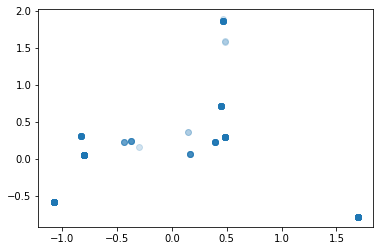

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA Clustering (透過 PCA Clustering 觀察資料的群聚現象)
pca = PCA(n_components=2)
X = pca.fit(seq_df).transform(seq_df)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

print("These two principle components have explained about {} % total variance"
        .format(round(sum(pca.explained_variance_ratio_)*100, 2)))

plt.figure()
plt.scatter(X[:, 0], X[:, 1], alpha=.2)
plt.show()

**嘗試 Two-gram**

**Two-gram**

In [29]:
# 首先建立 Two-gram API Set
two_gram_APISet = set()
for key in data:
    for i in range(len(data[key])-1):
        two_gram_APISet.add(data[key][i]+data[key][i+1])
two_gram_APIList = list(two_gram_APISet)
two_gram_APIDict = {api: i for i, api in enumerate(two_gram_APIList)}
# 查看這些檔案共有哪些行為 (Two-gram)
two_gram_APIDict

{'CopyFileCopyFile': 75,
 'CopyFileCreateFile': 66,
 'CopyFileCreateProcessInternal': 93,
 'CopyFileExitProcess': 61,
 'CopyFileLoadLibrary': 18,
 'CopyFileRegCreateKey': 24,
 'CopyFileRegQueryValue': 69,
 'CopyFileRegSetValue': 17,
 'CreateFileCopyFile': 32,
 'CreateFileCreateFile': 71,
 'CreateFileCreateProcessInternal': 12,
 'CreateFileCreateThread': 28,
 'CreateFileDeleteFile': 41,
 'CreateFileExitProcess': 87,
 'CreateFileLoadLibrary': 56,
 'CreateFileRegCreateKey': 46,
 'CreateFileRegEnumValue': 27,
 'CreateFileRegQueryValue': 59,
 'CreateFileRegSetValue': 5,
 'CreateProcessCreateProcessInternal': 10,
 'CreateProcessInternalCreateFile': 68,
 'CreateProcessInternalCreateProcess': 22,
 'CreateProcessInternalCreateProcessInternal': 96,
 'CreateProcessInternalLoadLibrary': 7,
 'CreateProcessInternalRegQueryValue': 51,
 'CreateProcessInternalWinExec': 13,
 'CreateProcessLoadLibrary': 50,
 'CreateProcessRegQueryValue': 80,
 'CreateRemoteThreadRegQueryValue': 23,
 'CreateThreadCreateFil

In [30]:
import pandas as pd

# 觀察這些檔案，看他們是否有做上面 two_gram_APISet 中的行為
two_gram_onehot_list_total = []
for key in data:
  two_gram_onehot_list = [0]*(len(two_gram_APIDict))
  for i in range(len(data[key])-1):
    action = data[key][i]+data[key][i+1]
    two_gram_onehot_list[two_gram_APIDict[action]] = 1
  two_gram_onehot_list_total.append(two_gram_onehot_list)

# 建立 DataFrame
two_gram_seq_df = pd.DataFrame(two_gram_onehot_list_total, columns=two_gram_APIList, index=data.keys())
two_gram_seq_df.head()

,HttpSendRequestRegQueryValue,DeleteFileDeleteFile,WinExecCreateFile,RegQueryValueLoadLibrary,CreateThreadCreateFile,CreateFileRegSetValue,RegSetValueRegDeleteKey,CreateProcessInternalLoadLibrary,LoadLibraryInternetConnect,RegSetValueRegCreateKey,CreateProcessCreateProcessInternal,OpenProcessCreateRemoteThread,CreateFileCreateProcessInternal,CreateProcessInternalWinExec,WinExecRegQueryValue,RegQueryValueRegCreateKey,LoadLibraryRegEnumValue,CopyFileRegSetValue,CopyFileLoadLibrary,RegQueryValueExitProcess,RegSetValueCreateFile,LoadLibraryCopyFile,CreateProcessInternalCreateProcess,CreateRemoteThreadRegQueryValue,CopyFileRegCreateKey,RegDeleteKeyRegDeleteKey,RegDeleteKeyCreateFile,CreateFileRegEnumValue,CreateFileCreateThread,RegCreateKeyLoadLibrary,RegSetValueRegQueryValue,RegCreateKeyCreateFile,CreateFileCopyFile,WinExecCreateProcessInternal,RegQueryValueInternetOpen,RegSetValueExitProcess,CreateThreadRegQueryValue,HttpSendRequestLoadLibrary,RegDeleteKeyRegCreateKey,RegSetValueRegSetValue,...,LoadLibraryRegDeleteKey,LoadLibraryLoadLibrary,CreateFileRegQueryValue,LoadLibraryRegCreateKey,CopyFileExitProcess,RegEnumValueLoadLibrary,RegEnumValueRegQueryValue,CreateThreadOpenProcess,InternetConnectRegQueryValue,CopyFileCreateFile,RegQueryValueCreateProcessInternal,CreateProcessInternalCreateFile,CopyFileRegQueryValue,RegQueryValueRegEnumValue,CreateFileCreateFile,RegEnumValueRegEnumValue,RegCreateKeyRegCreateKey,RegEnumValueRegCreateKey,CopyFileCopyFile,CreateThreadCreateThread,OpenProcessRegQueryValue,DeleteFileCreateFile,RegCreateKeyRegQueryValue,CreateProcessRegQueryValue,RegSetValueLoadLibrary,RegCreateKeyCopyFile,RegQueryValueInternetConnect,LoadLibraryInternetOpen,RegQueryValueCopyFile,LoadLibraryRegQueryValue,CreateFileExitProcess,OpenProcessCreateProcessInternal,LoadLibraryCreateProcessInternal,InternetOpenRegQueryValue,RegSetValueCopyFile,RegSetValueCreateThread,CopyFileCreateProcessInternal,RegCreateKeyCreateProcessInternal,RegQueryValueRegQueryValue,CreateProcessInternalCreateProcessInternal
11feca-3240,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11b4b7-3256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
726abc-3324,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8cc8d2-3248,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1
77d2c3-3228,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [31]:
two_gram_seq_df.sum()

HttpSendRequestRegQueryValue                    4
DeleteFileDeleteFile                            2
WinExecCreateFile                              18
RegQueryValueLoadLibrary                      316
CreateThreadCreateFile                          5
                                             ... 
RegSetValueCreateThread                        71
CopyFileCreateProcessInternal                   5
RegCreateKeyCreateProcessInternal               2
RegQueryValueRegQueryValue                    297
CreateProcessInternalCreateProcessInternal     32
Length: 97, dtype: int64

explained variance ratio: [0.3660519  0.16132725]
These two principle components have explained about 52.74 % total variance


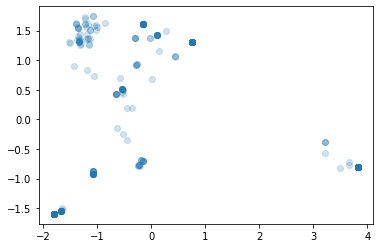

In [32]:
# Two-gram PCA Clustering
two_gram_pca = PCA(n_components=2)
two_gram_X = two_gram_pca.fit(two_gram_seq_df).transform(two_gram_seq_df)

print('explained variance ratio: %s'
      % str(two_gram_pca.explained_variance_ratio_))

print("These two principle components have explained about {} % total variance"
        .format(round(sum(two_gram_pca.explained_variance_ratio_)*100, 2)))

plt.figure()
plt.scatter(two_gram_X[:, 0], two_gram_X[:, 1], alpha=.2)
plt.show()

**用 Two-gram 的變數進行 KMeans 分群**

In [33]:
from sklearn.cluster import KMeans

# 透過 KMeans 分群 (已知資料共可以分成 9 群)
kmeans = KMeans(n_clusters=9)
kmeans.fit(two_gram_seq_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
# 查看前 10 筆資料的 Two-gram 分群結果
kmeans_df = pd.DataFrame({"class":kmeans.labels_})
kmeans_df.index = two_gram_seq_df.index
kmeans_df.head(10)

,class
11feca-3240,5
11b4b7-3256,5
726abc-3324,1
8cc8d2-3248,4
77d2c3-3228,1
7800ca-3236,1
9dd189-3332,4
78926a-3276,1
7fbf32-3304,1
803824-3348,1


In [35]:
# actually the 'data' has 9 different classes
# however, you do not know the class lable of each item
# so you can not perform classification
# therefore clustering might be a feasible solution.
# now try to to clustering by using the 316 items
# at the end, you should tell us the member of each cluster

# 查看 Two-gram 最終分群結果
for i in range(9):
  print("the", i, "cluster contains the following members (keys):", )
  data = kmeans_df[kmeans_df["class"] == i].index
  for key in data:
    print(key)
  print("-"*30)

the 0 cluster contains the following members (keys):
d6d1ed-3360
0316c4-3320
7a28c0-3208
6f73aa-3392
6546cc-3184
329d35-3328
28efa1-3272
329d35-gSDXp90
31260c-3176
329d35-q3PEZ9r
329d35-3384
2fbc8c-3284
245b08-3284
405c75-3248
4b9f98-3056
4ab715-3208
e0428e-3252
fe7658-3224
e26147-3260
fb4273-3224
73d1ab-3260
9f8b03-3408
802d6c-3300
c6d288-3216
08d0f7-3308
bd9a4b-3400
b60814-2840
b04e89-3176
bdf002-3304
b71a4a-3256
aa634c-3232
d4743b-3304
------------------------------
the 1 cluster contains the following members (keys):
726abc-3324
77d2c3-3228
7800ca-3236
78926a-3276
7fbf32-3304
803824-3348
870bdd-3244
8a0fd7-3220
8c654c-3252
8d92e5-3292
8e97c8-3332
93364c-3220
9c4c45-3264
a14381-3236
a57a8b-3232
acc5d5-3332
acf761-3268
b04a4d-3104
b10c0d-3204
bc549f-3252
6ea50f-3184
ce3d89-3292
d4026d-3440
e2a289-3300
e43a4a-2900
ee88fd-3312
efa5fd-3240
f0b430-3228
f295e3-3284
f29a2d-3244
f94c51-3204
fca30f-3256
ffdab6-3244
ffdc67-3268
ffdd1a-3176
ffdf02-3236
ffdf46-3212
ffeaf2-3240
fff1a3-3224
fff4e